In [ ]:
pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 28 * 28)  # 28x28 image size (MNIST)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()  # To output values between -1 and 1

    def forward(self, z):
        z = self.relu(self.fc1(z))
        z = self.relu(self.fc2(z))
        z = self.relu(self.fc3(z))
        img = self.tanh(self.fc4(z))  # Flattened 28x28 image
        return img.view(-1, 1, 28, 28)

# Define the Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)  # Output a single value, probability of real/fake
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, img):
        img = img.view(img.size(0), -1)  # Flatten the image
        x = self.leaky_relu(self.fc1(img))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

# Initialize the models
generator = Generator().to(device)
discriminator = Discriminator().to(device)


In [ ]:
# Download and prepare MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 143MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 24.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 35.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.58MB/s]


In [ ]:
# Loss function
criterion = nn.BCELoss()

# Optimizers
lr = 0.0002
beta1 = 0.5
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))


Epoch [0/30], Batch [0/938], D Loss: 0.6884, G Loss: 0.7001
Epoch [0/30], Batch [100/938], D Loss: 0.8275, G Loss: 0.7433
Epoch [0/30], Batch [200/938], D Loss: 0.3098, G Loss: 2.2477
Epoch [0/30], Batch [300/938], D Loss: 0.2079, G Loss: 2.8242
Epoch [0/30], Batch [400/938], D Loss: 0.2502, G Loss: 2.9355
Epoch [0/30], Batch [500/938], D Loss: 0.1748, G Loss: 3.6002
Epoch [0/30], Batch [600/938], D Loss: 0.2146, G Loss: 4.3907
Epoch [0/30], Batch [700/938], D Loss: 0.1479, G Loss: 2.6186
Epoch [0/30], Batch [800/938], D Loss: 0.1701, G Loss: 6.4393
Epoch [0/30], Batch [900/938], D Loss: 0.1043, G Loss: 3.8059


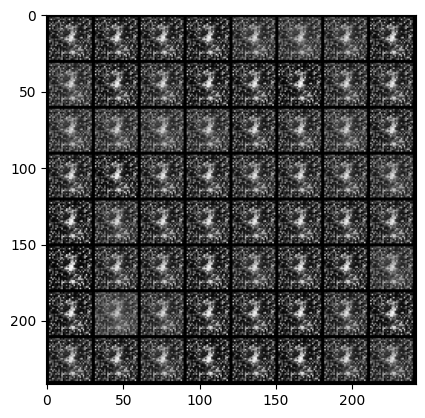

Epoch [1/30], Batch [0/938], D Loss: 0.8059, G Loss: 8.5969
Epoch [1/30], Batch [100/938], D Loss: 0.1675, G Loss: 5.8217
Epoch [1/30], Batch [200/938], D Loss: 0.1415, G Loss: 2.8431
Epoch [1/30], Batch [300/938], D Loss: 0.2181, G Loss: 1.8750
Epoch [1/30], Batch [400/938], D Loss: 0.1027, G Loss: 4.1469
Epoch [1/30], Batch [500/938], D Loss: 0.0673, G Loss: 4.9905
Epoch [1/30], Batch [600/938], D Loss: 0.2566, G Loss: 1.9575
Epoch [1/30], Batch [700/938], D Loss: 0.0701, G Loss: 2.9600
Epoch [1/30], Batch [800/938], D Loss: 0.0641, G Loss: 4.5957
Epoch [1/30], Batch [900/938], D Loss: 0.1655, G Loss: 5.0379


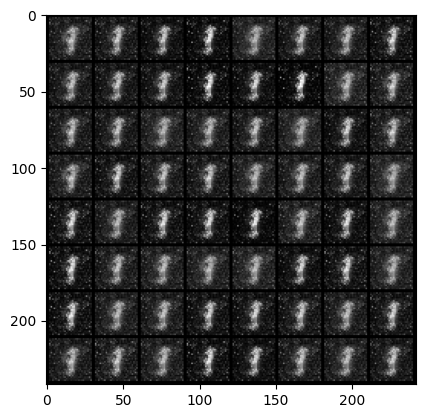

Epoch [2/30], Batch [0/938], D Loss: 0.2000, G Loss: 3.0518
Epoch [2/30], Batch [100/938], D Loss: 0.1081, G Loss: 3.2151
Epoch [2/30], Batch [200/938], D Loss: 0.2064, G Loss: 2.4133
Epoch [2/30], Batch [300/938], D Loss: 0.0226, G Loss: 4.3051
Epoch [2/30], Batch [400/938], D Loss: 0.0472, G Loss: 3.4349
Epoch [2/30], Batch [500/938], D Loss: 0.1583, G Loss: 2.9999
Epoch [2/30], Batch [600/938], D Loss: 0.1820, G Loss: 1.5192
Epoch [2/30], Batch [700/938], D Loss: 0.6616, G Loss: 2.6017
Epoch [2/30], Batch [800/938], D Loss: 0.1338, G Loss: 2.9310
Epoch [2/30], Batch [900/938], D Loss: 0.0530, G Loss: 3.9349


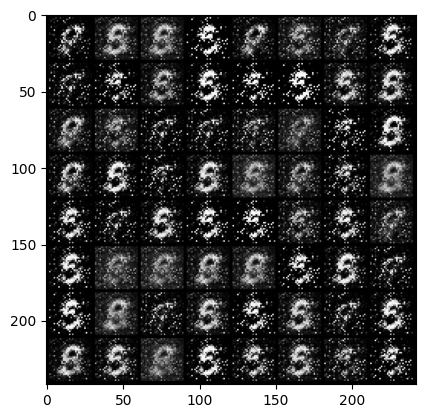

Epoch [3/30], Batch [0/938], D Loss: 0.1438, G Loss: 5.8715
Epoch [3/30], Batch [100/938], D Loss: 0.2574, G Loss: 4.3337
Epoch [3/30], Batch [200/938], D Loss: 0.6980, G Loss: 4.0993
Epoch [3/30], Batch [300/938], D Loss: 0.1016, G Loss: 3.0889
Epoch [3/30], Batch [400/938], D Loss: 0.1098, G Loss: 1.5395
Epoch [3/30], Batch [500/938], D Loss: 0.2710, G Loss: 2.0799
Epoch [3/30], Batch [600/938], D Loss: 0.1246, G Loss: 2.6281
Epoch [3/30], Batch [700/938], D Loss: 0.1165, G Loss: 3.9170
Epoch [3/30], Batch [800/938], D Loss: 0.0271, G Loss: 4.1840
Epoch [3/30], Batch [900/938], D Loss: 0.4219, G Loss: 7.7616


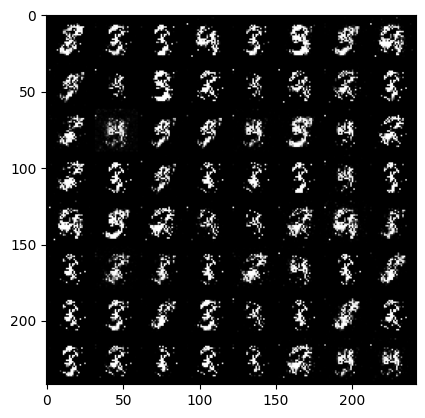

Epoch [4/30], Batch [0/938], D Loss: 0.1281, G Loss: 3.5036
Epoch [4/30], Batch [100/938], D Loss: 0.0901, G Loss: 3.0888
Epoch [4/30], Batch [200/938], D Loss: 0.0704, G Loss: 4.5622
Epoch [4/30], Batch [300/938], D Loss: 0.0887, G Loss: 5.2169
Epoch [4/30], Batch [400/938], D Loss: 0.0705, G Loss: 3.4619
Epoch [4/30], Batch [500/938], D Loss: 0.0460, G Loss: 3.3500
Epoch [4/30], Batch [600/938], D Loss: 0.0736, G Loss: 3.3427
Epoch [4/30], Batch [700/938], D Loss: 0.1119, G Loss: 2.8232
Epoch [4/30], Batch [800/938], D Loss: 0.1030, G Loss: 2.7964
Epoch [4/30], Batch [900/938], D Loss: 0.0135, G Loss: 5.3144


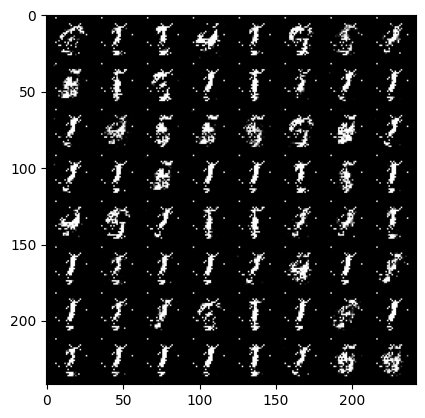

Epoch [5/30], Batch [0/938], D Loss: 0.0327, G Loss: 3.3655
Epoch [5/30], Batch [100/938], D Loss: 0.0758, G Loss: 3.0572
Epoch [5/30], Batch [200/938], D Loss: 0.1048, G Loss: 3.0433
Epoch [5/30], Batch [300/938], D Loss: 0.0915, G Loss: 2.9079
Epoch [5/30], Batch [400/938], D Loss: 0.1594, G Loss: 2.6450
Epoch [5/30], Batch [500/938], D Loss: 0.1648, G Loss: 3.1368
Epoch [5/30], Batch [600/938], D Loss: 0.1386, G Loss: 2.7652
Epoch [5/30], Batch [700/938], D Loss: 0.2437, G Loss: 3.4575
Epoch [5/30], Batch [800/938], D Loss: 0.2031, G Loss: 2.1097
Epoch [5/30], Batch [900/938], D Loss: 0.3217, G Loss: 2.6597


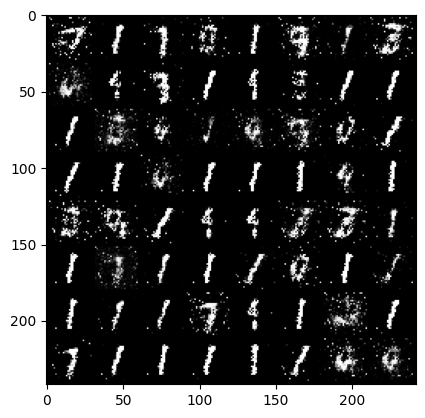

Epoch [6/30], Batch [0/938], D Loss: 0.5241, G Loss: 5.4077
Epoch [6/30], Batch [100/938], D Loss: 0.2846, G Loss: 1.3604
Epoch [6/30], Batch [200/938], D Loss: 0.2854, G Loss: 2.0814
Epoch [6/30], Batch [300/938], D Loss: 0.2445, G Loss: 2.0050
Epoch [6/30], Batch [400/938], D Loss: 0.3190, G Loss: 3.5798
Epoch [6/30], Batch [500/938], D Loss: 0.2897, G Loss: 1.5240
Epoch [6/30], Batch [600/938], D Loss: 0.2717, G Loss: 2.6044
Epoch [6/30], Batch [700/938], D Loss: 0.2415, G Loss: 2.2214
Epoch [6/30], Batch [800/938], D Loss: 0.5804, G Loss: 2.0474
Epoch [6/30], Batch [900/938], D Loss: 0.3783, G Loss: 1.6503


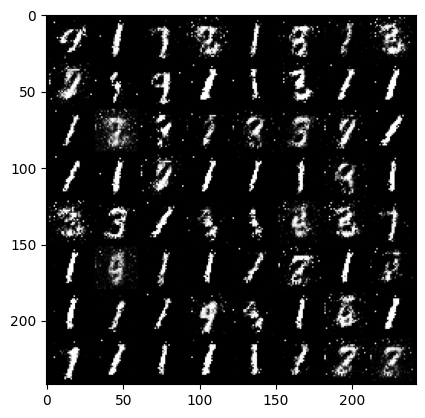

Epoch [7/30], Batch [0/938], D Loss: 0.3148, G Loss: 1.7971
Epoch [7/30], Batch [100/938], D Loss: 0.3363, G Loss: 1.8143
Epoch [7/30], Batch [200/938], D Loss: 0.3176, G Loss: 1.5912
Epoch [7/30], Batch [300/938], D Loss: 0.4849, G Loss: 1.5383
Epoch [7/30], Batch [400/938], D Loss: 0.3290, G Loss: 2.2776
Epoch [7/30], Batch [500/938], D Loss: 0.3472, G Loss: 2.0693
Epoch [7/30], Batch [600/938], D Loss: 0.3260, G Loss: 2.2692
Epoch [7/30], Batch [700/938], D Loss: 0.2954, G Loss: 1.6346
Epoch [7/30], Batch [800/938], D Loss: 0.4645, G Loss: 1.5176
Epoch [7/30], Batch [900/938], D Loss: 0.2935, G Loss: 2.7096


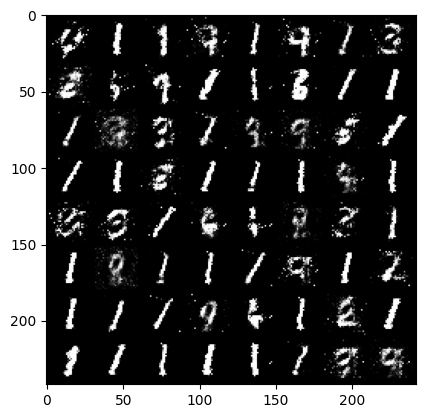

Epoch [8/30], Batch [0/938], D Loss: 0.2965, G Loss: 2.9356
Epoch [8/30], Batch [100/938], D Loss: 0.3744, G Loss: 1.5252
Epoch [8/30], Batch [200/938], D Loss: 0.3635, G Loss: 1.3789
Epoch [8/30], Batch [300/938], D Loss: 0.3473, G Loss: 1.6663
Epoch [8/30], Batch [400/938], D Loss: 0.3434, G Loss: 2.2871
Epoch [8/30], Batch [500/938], D Loss: 0.3397, G Loss: 2.0430
Epoch [8/30], Batch [600/938], D Loss: 0.4712, G Loss: 1.1101
Epoch [8/30], Batch [700/938], D Loss: 0.4155, G Loss: 1.8267
Epoch [8/30], Batch [800/938], D Loss: 0.3611, G Loss: 1.9350
Epoch [8/30], Batch [900/938], D Loss: 0.3667, G Loss: 1.3202


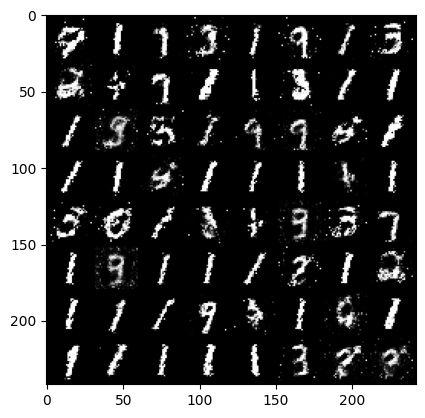

Epoch [9/30], Batch [0/938], D Loss: 0.3316, G Loss: 2.7122
Epoch [9/30], Batch [100/938], D Loss: 0.3779, G Loss: 2.3260
Epoch [9/30], Batch [200/938], D Loss: 0.3782, G Loss: 1.9719
Epoch [9/30], Batch [300/938], D Loss: 0.4277, G Loss: 2.0712
Epoch [9/30], Batch [400/938], D Loss: 0.4645, G Loss: 2.2575
Epoch [9/30], Batch [500/938], D Loss: 0.4256, G Loss: 1.9641
Epoch [9/30], Batch [600/938], D Loss: 0.3639, G Loss: 1.8751
Epoch [9/30], Batch [700/938], D Loss: 0.3852, G Loss: 2.7990
Epoch [9/30], Batch [800/938], D Loss: 0.4636, G Loss: 1.9183
Epoch [9/30], Batch [900/938], D Loss: 0.3759, G Loss: 1.5350


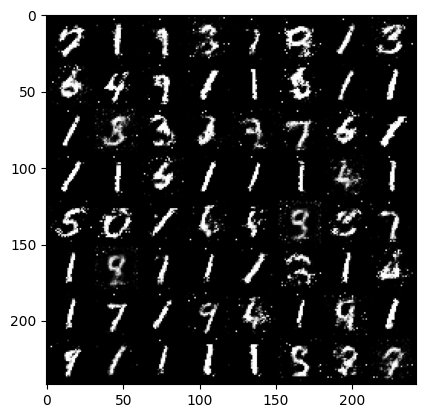

Epoch [10/30], Batch [0/938], D Loss: 0.4252, G Loss: 1.8362
Epoch [10/30], Batch [100/938], D Loss: 0.4011, G Loss: 1.5012
Epoch [10/30], Batch [200/938], D Loss: 0.4012, G Loss: 1.9016
Epoch [10/30], Batch [300/938], D Loss: 0.4173, G Loss: 1.6590
Epoch [10/30], Batch [400/938], D Loss: 0.4234, G Loss: 1.4599
Epoch [10/30], Batch [500/938], D Loss: 0.3824, G Loss: 1.5789
Epoch [10/30], Batch [600/938], D Loss: 0.4044, G Loss: 1.3846
Epoch [10/30], Batch [700/938], D Loss: 0.4378, G Loss: 1.5405
Epoch [10/30], Batch [800/938], D Loss: 0.4029, G Loss: 1.5678
Epoch [10/30], Batch [900/938], D Loss: 0.4818, G Loss: 1.9180


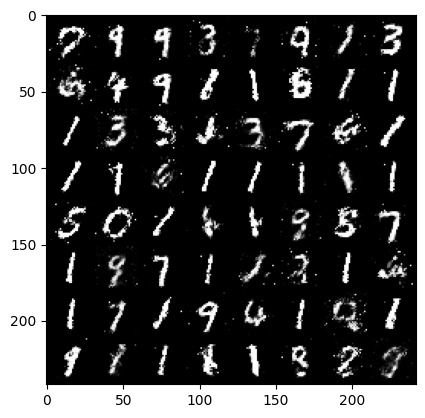

Epoch [11/30], Batch [0/938], D Loss: 0.3739, G Loss: 1.7626
Epoch [11/30], Batch [100/938], D Loss: 0.4944, G Loss: 1.0774
Epoch [11/30], Batch [200/938], D Loss: 0.4379, G Loss: 2.2533
Epoch [11/30], Batch [300/938], D Loss: 0.5077, G Loss: 1.3974
Epoch [11/30], Batch [400/938], D Loss: 0.3689, G Loss: 2.5243
Epoch [11/30], Batch [500/938], D Loss: 0.3654, G Loss: 1.3847
Epoch [11/30], Batch [600/938], D Loss: 0.4064, G Loss: 2.0731
Epoch [11/30], Batch [700/938], D Loss: 0.4015, G Loss: 1.4948
Epoch [11/30], Batch [800/938], D Loss: 0.4224, G Loss: 2.1655
Epoch [11/30], Batch [900/938], D Loss: 0.3905, G Loss: 2.0277


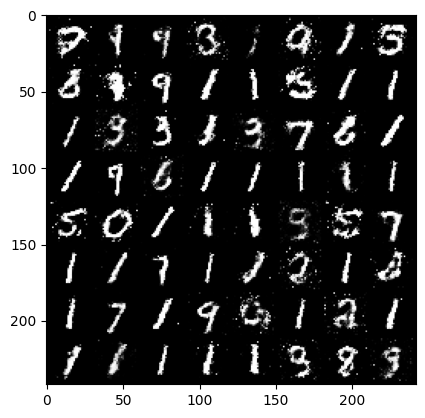

Epoch [12/30], Batch [0/938], D Loss: 0.5342, G Loss: 2.3631
Epoch [12/30], Batch [100/938], D Loss: 0.4257, G Loss: 1.6821
Epoch [12/30], Batch [200/938], D Loss: 0.4439, G Loss: 2.0520
Epoch [12/30], Batch [300/938], D Loss: 0.4354, G Loss: 1.4720
Epoch [12/30], Batch [400/938], D Loss: 0.3670, G Loss: 2.0491
Epoch [12/30], Batch [500/938], D Loss: 0.4144, G Loss: 1.4839
Epoch [12/30], Batch [600/938], D Loss: 0.4220, G Loss: 1.4417
Epoch [12/30], Batch [700/938], D Loss: 0.4655, G Loss: 1.9414
Epoch [12/30], Batch [800/938], D Loss: 0.4195, G Loss: 1.7844
Epoch [12/30], Batch [900/938], D Loss: 0.4521, G Loss: 2.6099


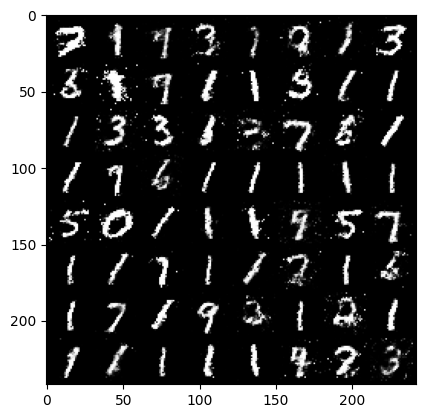

Epoch [13/30], Batch [0/938], D Loss: 0.4085, G Loss: 2.0297
Epoch [13/30], Batch [100/938], D Loss: 0.3947, G Loss: 1.4588
Epoch [13/30], Batch [200/938], D Loss: 0.3495, G Loss: 1.5879
Epoch [13/30], Batch [300/938], D Loss: 0.4559, G Loss: 1.7070
Epoch [13/30], Batch [400/938], D Loss: 0.5285, G Loss: 1.6825
Epoch [13/30], Batch [500/938], D Loss: 0.4791, G Loss: 1.3713
Epoch [13/30], Batch [600/938], D Loss: 0.3772, G Loss: 1.8045
Epoch [13/30], Batch [700/938], D Loss: 0.4088, G Loss: 1.7589
Epoch [13/30], Batch [800/938], D Loss: 0.3514, G Loss: 1.3828
Epoch [13/30], Batch [900/938], D Loss: 0.4097, G Loss: 1.1117


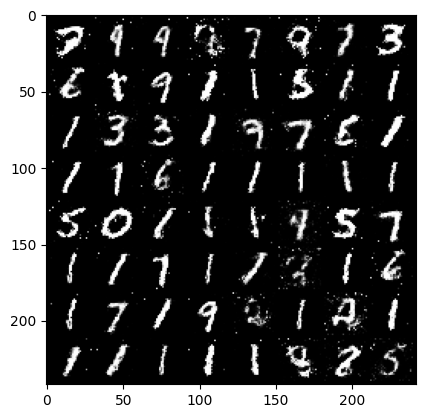

Epoch [14/30], Batch [0/938], D Loss: 0.4165, G Loss: 1.6354
Epoch [14/30], Batch [100/938], D Loss: 0.4091, G Loss: 2.0794
Epoch [14/30], Batch [200/938], D Loss: 0.4507, G Loss: 1.4524
Epoch [14/30], Batch [300/938], D Loss: 0.4101, G Loss: 1.5204
Epoch [14/30], Batch [400/938], D Loss: 0.4793, G Loss: 1.4521
Epoch [14/30], Batch [500/938], D Loss: 0.4047, G Loss: 1.7480
Epoch [14/30], Batch [600/938], D Loss: 0.4673, G Loss: 1.4704
Epoch [14/30], Batch [700/938], D Loss: 0.3803, G Loss: 1.9576
Epoch [14/30], Batch [800/938], D Loss: 0.4133, G Loss: 2.3216
Epoch [14/30], Batch [900/938], D Loss: 0.4002, G Loss: 1.5034


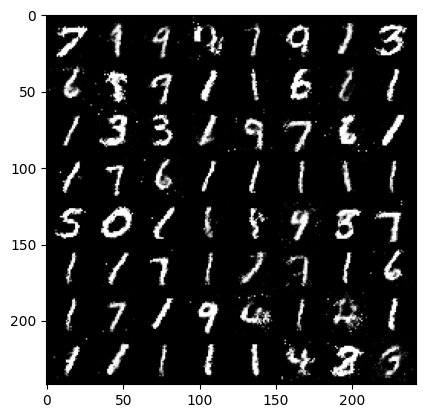

Epoch [15/30], Batch [0/938], D Loss: 0.4890, G Loss: 2.4168
Epoch [15/30], Batch [100/938], D Loss: 0.4070, G Loss: 1.6315
Epoch [15/30], Batch [200/938], D Loss: 0.4205, G Loss: 3.1123
Epoch [15/30], Batch [300/938], D Loss: 0.4006, G Loss: 2.0155
Epoch [15/30], Batch [400/938], D Loss: 0.3689, G Loss: 1.5135
Epoch [15/30], Batch [500/938], D Loss: 0.4244, G Loss: 1.3794
Epoch [15/30], Batch [600/938], D Loss: 0.4416, G Loss: 1.6689
Epoch [15/30], Batch [700/938], D Loss: 0.5370, G Loss: 2.6176
Epoch [15/30], Batch [800/938], D Loss: 0.4335, G Loss: 1.8142
Epoch [15/30], Batch [900/938], D Loss: 0.4689, G Loss: 1.8988


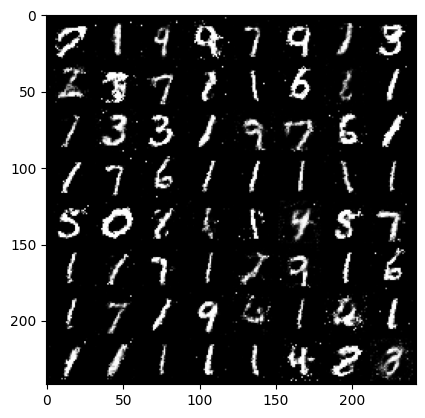

Epoch [16/30], Batch [0/938], D Loss: 0.5088, G Loss: 1.7779
Epoch [16/30], Batch [100/938], D Loss: 0.3626, G Loss: 1.7125
Epoch [16/30], Batch [200/938], D Loss: 0.5009, G Loss: 1.4493
Epoch [16/30], Batch [300/938], D Loss: 0.5382, G Loss: 1.0747
Epoch [16/30], Batch [400/938], D Loss: 0.4807, G Loss: 1.5001
Epoch [16/30], Batch [500/938], D Loss: 0.4623, G Loss: 1.6369
Epoch [16/30], Batch [600/938], D Loss: 0.4769, G Loss: 2.2567
Epoch [16/30], Batch [700/938], D Loss: 0.4876, G Loss: 2.0753
Epoch [16/30], Batch [800/938], D Loss: 0.4529, G Loss: 1.6888
Epoch [16/30], Batch [900/938], D Loss: 0.4791, G Loss: 2.2971


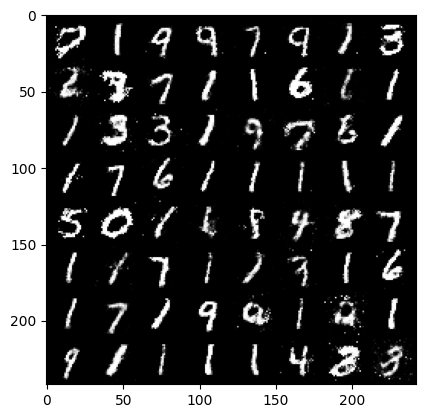

Epoch [17/30], Batch [0/938], D Loss: 0.5031, G Loss: 2.1696
Epoch [17/30], Batch [100/938], D Loss: 0.4381, G Loss: 1.3837
Epoch [17/30], Batch [200/938], D Loss: 0.3699, G Loss: 1.3355
Epoch [17/30], Batch [300/938], D Loss: 0.4487, G Loss: 2.1071
Epoch [17/30], Batch [400/938], D Loss: 0.5021, G Loss: 1.6375
Epoch [17/30], Batch [500/938], D Loss: 0.3678, G Loss: 1.8511
Epoch [17/30], Batch [600/938], D Loss: 0.4781, G Loss: 1.4701
Epoch [17/30], Batch [700/938], D Loss: 0.3877, G Loss: 1.5565
Epoch [17/30], Batch [800/938], D Loss: 0.4968, G Loss: 1.6007
Epoch [17/30], Batch [900/938], D Loss: 0.4301, G Loss: 1.6282


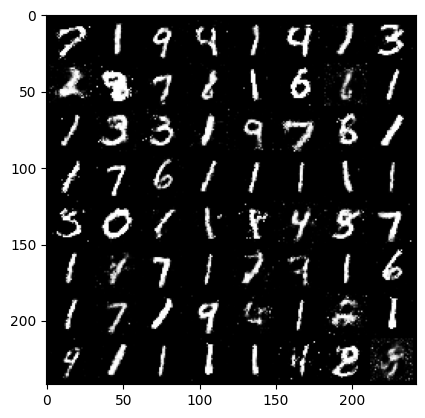

Epoch [18/30], Batch [0/938], D Loss: 0.3960, G Loss: 1.5288
Epoch [18/30], Batch [100/938], D Loss: 0.4170, G Loss: 1.6225
Epoch [18/30], Batch [200/938], D Loss: 0.3902, G Loss: 1.7349
Epoch [18/30], Batch [300/938], D Loss: 0.4709, G Loss: 1.3544
Epoch [18/30], Batch [400/938], D Loss: 0.3728, G Loss: 1.4963
Epoch [18/30], Batch [500/938], D Loss: 0.5536, G Loss: 0.8429
Epoch [18/30], Batch [600/938], D Loss: 0.5344, G Loss: 1.7463
Epoch [18/30], Batch [700/938], D Loss: 0.5742, G Loss: 1.1246
Epoch [18/30], Batch [800/938], D Loss: 0.4093, G Loss: 2.0143
Epoch [18/30], Batch [900/938], D Loss: 0.4576, G Loss: 1.4219


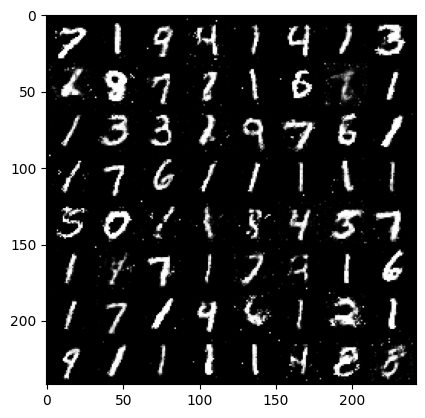

Epoch [19/30], Batch [0/938], D Loss: 0.4296, G Loss: 1.7077
Epoch [19/30], Batch [100/938], D Loss: 0.4766, G Loss: 1.4160
Epoch [19/30], Batch [200/938], D Loss: 0.4797, G Loss: 1.6228
Epoch [19/30], Batch [300/938], D Loss: 0.4215, G Loss: 1.5124
Epoch [19/30], Batch [400/938], D Loss: 0.4151, G Loss: 1.7348
Epoch [19/30], Batch [500/938], D Loss: 0.5155, G Loss: 1.0993
Epoch [19/30], Batch [600/938], D Loss: 0.4306, G Loss: 2.0299
Epoch [19/30], Batch [700/938], D Loss: 0.4422, G Loss: 2.0612
Epoch [19/30], Batch [800/938], D Loss: 0.5293, G Loss: 1.6461
Epoch [19/30], Batch [900/938], D Loss: 0.5595, G Loss: 1.4753


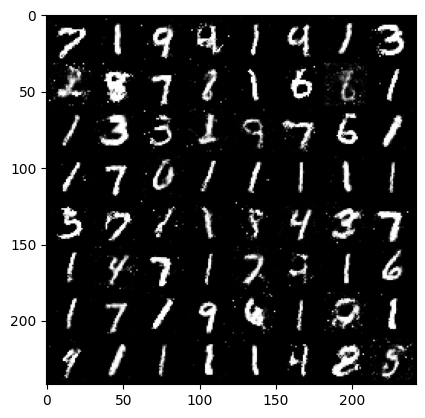

Epoch [20/30], Batch [0/938], D Loss: 0.5004, G Loss: 2.0851
Epoch [20/30], Batch [100/938], D Loss: 0.4012, G Loss: 1.5200
Epoch [20/30], Batch [200/938], D Loss: 0.4891, G Loss: 1.7758
Epoch [20/30], Batch [300/938], D Loss: 0.4773, G Loss: 1.7312
Epoch [20/30], Batch [400/938], D Loss: 0.4759, G Loss: 1.5455
Epoch [20/30], Batch [500/938], D Loss: 0.3977, G Loss: 1.5030
Epoch [20/30], Batch [600/938], D Loss: 0.4502, G Loss: 1.8120
Epoch [20/30], Batch [700/938], D Loss: 0.4255, G Loss: 1.5119
Epoch [20/30], Batch [800/938], D Loss: 0.4285, G Loss: 1.2289
Epoch [20/30], Batch [900/938], D Loss: 0.4990, G Loss: 1.6556


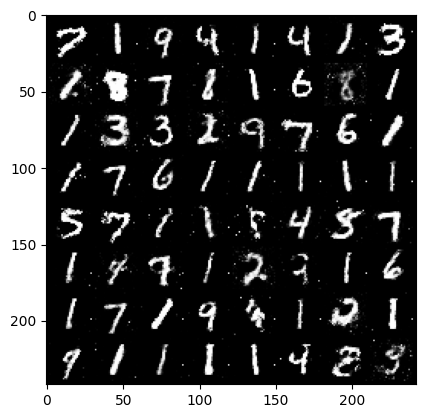

Epoch [21/30], Batch [0/938], D Loss: 0.4298, G Loss: 1.5683
Epoch [21/30], Batch [100/938], D Loss: 0.4401, G Loss: 1.3249
Epoch [21/30], Batch [200/938], D Loss: 0.5726, G Loss: 1.3411
Epoch [21/30], Batch [300/938], D Loss: 0.4540, G Loss: 1.5189
Epoch [21/30], Batch [400/938], D Loss: 0.4142, G Loss: 1.5493
Epoch [21/30], Batch [500/938], D Loss: 0.3737, G Loss: 1.5796
Epoch [21/30], Batch [600/938], D Loss: 0.4697, G Loss: 1.1423
Epoch [21/30], Batch [700/938], D Loss: 0.4346, G Loss: 1.3128
Epoch [21/30], Batch [800/938], D Loss: 0.5394, G Loss: 1.4251
Epoch [21/30], Batch [900/938], D Loss: 0.4669, G Loss: 1.9781


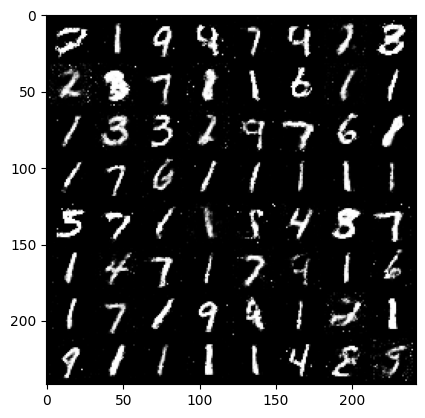

Epoch [22/30], Batch [0/938], D Loss: 0.4926, G Loss: 1.6715
Epoch [22/30], Batch [100/938], D Loss: 0.4576, G Loss: 1.7099
Epoch [22/30], Batch [200/938], D Loss: 0.5600, G Loss: 1.0227
Epoch [22/30], Batch [300/938], D Loss: 0.3874, G Loss: 1.6092
Epoch [22/30], Batch [400/938], D Loss: 0.4408, G Loss: 1.8994
Epoch [22/30], Batch [500/938], D Loss: 0.4619, G Loss: 1.9033
Epoch [22/30], Batch [600/938], D Loss: 0.5083, G Loss: 2.0001
Epoch [22/30], Batch [700/938], D Loss: 0.4030, G Loss: 1.5059
Epoch [22/30], Batch [800/938], D Loss: 0.5022, G Loss: 1.1890
Epoch [22/30], Batch [900/938], D Loss: 0.5293, G Loss: 1.5975


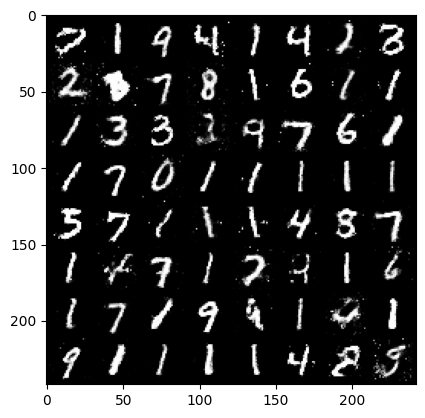

Epoch [23/30], Batch [0/938], D Loss: 0.4892, G Loss: 1.5773
Epoch [23/30], Batch [100/938], D Loss: 0.4663, G Loss: 1.4469
Epoch [23/30], Batch [200/938], D Loss: 0.4193, G Loss: 1.9001
Epoch [23/30], Batch [300/938], D Loss: 0.4112, G Loss: 1.8125
Epoch [23/30], Batch [400/938], D Loss: 0.4628, G Loss: 1.4230
Epoch [23/30], Batch [500/938], D Loss: 0.4565, G Loss: 1.9109
Epoch [23/30], Batch [600/938], D Loss: 0.4326, G Loss: 1.3147
Epoch [23/30], Batch [700/938], D Loss: 0.4782, G Loss: 1.7085
Epoch [23/30], Batch [800/938], D Loss: 0.4721, G Loss: 1.2742
Epoch [23/30], Batch [900/938], D Loss: 0.5341, G Loss: 2.0467


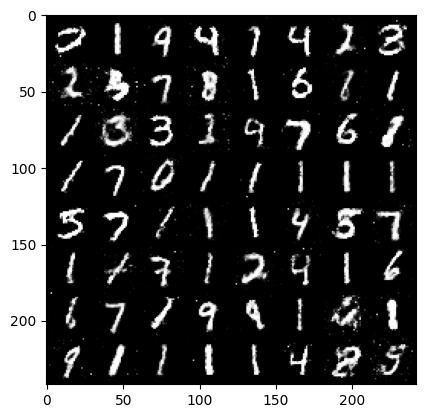

Epoch [24/30], Batch [0/938], D Loss: 0.4860, G Loss: 1.4735
Epoch [24/30], Batch [100/938], D Loss: 0.4837, G Loss: 1.8510
Epoch [24/30], Batch [200/938], D Loss: 0.4621, G Loss: 1.4950
Epoch [24/30], Batch [300/938], D Loss: 0.4744, G Loss: 1.7869
Epoch [24/30], Batch [400/938], D Loss: 0.4944, G Loss: 1.1835
Epoch [24/30], Batch [500/938], D Loss: 0.4063, G Loss: 1.2799
Epoch [24/30], Batch [600/938], D Loss: 0.6908, G Loss: 1.2506
Epoch [24/30], Batch [700/938], D Loss: 0.5008, G Loss: 1.6742
Epoch [24/30], Batch [800/938], D Loss: 0.5619, G Loss: 1.7461
Epoch [24/30], Batch [900/938], D Loss: 0.4770, G Loss: 1.0992


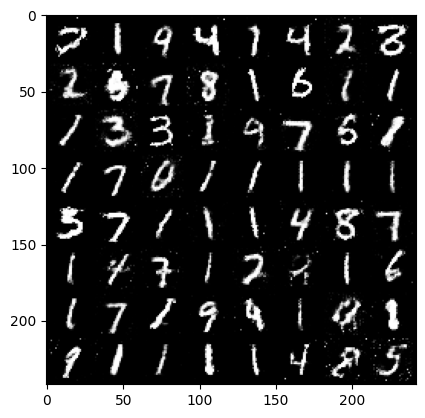

Epoch [25/30], Batch [0/938], D Loss: 0.4899, G Loss: 1.3042
Epoch [25/30], Batch [100/938], D Loss: 0.4587, G Loss: 1.4998
Epoch [25/30], Batch [200/938], D Loss: 0.4958, G Loss: 1.7424
Epoch [25/30], Batch [300/938], D Loss: 0.4931, G Loss: 1.9257
Epoch [25/30], Batch [400/938], D Loss: 0.5020, G Loss: 1.3676
Epoch [25/30], Batch [500/938], D Loss: 0.3630, G Loss: 1.8683
Epoch [25/30], Batch [600/938], D Loss: 0.5205, G Loss: 2.6139
Epoch [25/30], Batch [700/938], D Loss: 0.4498, G Loss: 1.5570
Epoch [25/30], Batch [800/938], D Loss: 0.5293, G Loss: 1.3275
Epoch [25/30], Batch [900/938], D Loss: 0.4556, G Loss: 1.5039


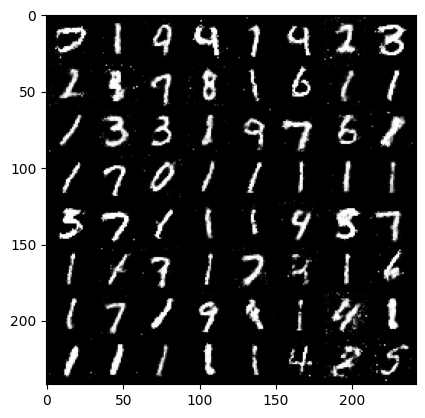

Epoch [26/30], Batch [0/938], D Loss: 0.5079, G Loss: 1.3193
Epoch [26/30], Batch [100/938], D Loss: 0.4103, G Loss: 1.6335
Epoch [26/30], Batch [200/938], D Loss: 0.4270, G Loss: 1.4834
Epoch [26/30], Batch [300/938], D Loss: 0.5674, G Loss: 1.4224
Epoch [26/30], Batch [400/938], D Loss: 0.3978, G Loss: 1.9876
Epoch [26/30], Batch [500/938], D Loss: 0.4672, G Loss: 1.4107
Epoch [26/30], Batch [600/938], D Loss: 0.4612, G Loss: 1.3904
Epoch [26/30], Batch [700/938], D Loss: 0.4508, G Loss: 2.1878
Epoch [26/30], Batch [800/938], D Loss: 0.4707, G Loss: 2.3353
Epoch [26/30], Batch [900/938], D Loss: 0.5036, G Loss: 1.8038


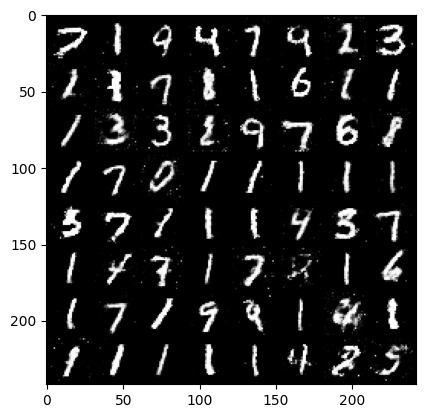

Epoch [27/30], Batch [0/938], D Loss: 0.3892, G Loss: 1.5534
Epoch [27/30], Batch [100/938], D Loss: 0.4864, G Loss: 1.6550
Epoch [27/30], Batch [200/938], D Loss: 0.4873, G Loss: 1.6429
Epoch [27/30], Batch [300/938], D Loss: 0.5226, G Loss: 2.1221
Epoch [27/30], Batch [400/938], D Loss: 0.4697, G Loss: 1.2383
Epoch [27/30], Batch [500/938], D Loss: 0.4152, G Loss: 1.3041
Epoch [27/30], Batch [600/938], D Loss: 0.4550, G Loss: 1.8992
Epoch [27/30], Batch [700/938], D Loss: 0.3977, G Loss: 1.9429
Epoch [27/30], Batch [800/938], D Loss: 0.4861, G Loss: 1.5292
Epoch [27/30], Batch [900/938], D Loss: 0.3976, G Loss: 1.3838


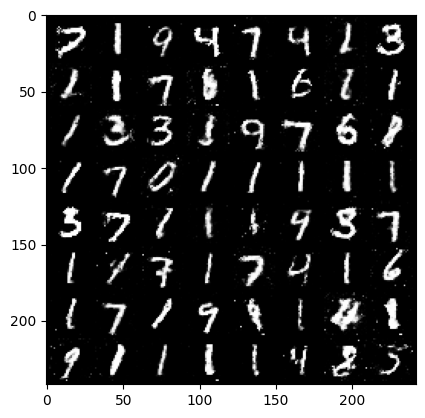

Epoch [28/30], Batch [0/938], D Loss: 0.4845, G Loss: 1.8961
Epoch [28/30], Batch [100/938], D Loss: 0.4500, G Loss: 1.4707
Epoch [28/30], Batch [200/938], D Loss: 0.5391, G Loss: 1.2898
Epoch [28/30], Batch [300/938], D Loss: 0.5297, G Loss: 1.4547
Epoch [28/30], Batch [400/938], D Loss: 0.5065, G Loss: 1.1619
Epoch [28/30], Batch [500/938], D Loss: 0.4691, G Loss: 1.2565
Epoch [28/30], Batch [600/938], D Loss: 0.5312, G Loss: 1.2538
Epoch [28/30], Batch [700/938], D Loss: 0.4561, G Loss: 1.4299
Epoch [28/30], Batch [800/938], D Loss: 0.5542, G Loss: 1.8395
Epoch [28/30], Batch [900/938], D Loss: 0.4704, G Loss: 1.4123


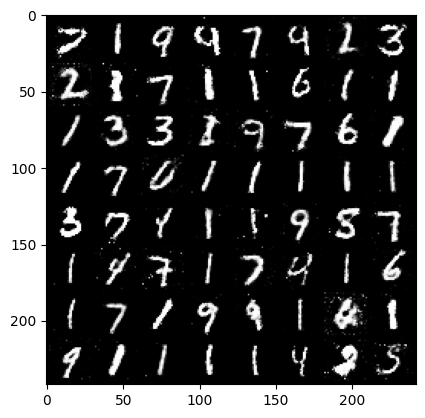

Epoch [29/30], Batch [0/938], D Loss: 0.4971, G Loss: 1.1016
Epoch [29/30], Batch [100/938], D Loss: 0.5074, G Loss: 1.1622
Epoch [29/30], Batch [200/938], D Loss: 0.5026, G Loss: 1.5222
Epoch [29/30], Batch [300/938], D Loss: 0.5387, G Loss: 1.2069
Epoch [29/30], Batch [400/938], D Loss: 0.4528, G Loss: 1.5614
Epoch [29/30], Batch [500/938], D Loss: 0.4145, G Loss: 1.3467
Epoch [29/30], Batch [600/938], D Loss: 0.4770, G Loss: 1.2001
Epoch [29/30], Batch [700/938], D Loss: 0.3757, G Loss: 1.5528
Epoch [29/30], Batch [800/938], D Loss: 0.4382, G Loss: 1.4941
Epoch [29/30], Batch [900/938], D Loss: 0.5005, G Loss: 1.6337


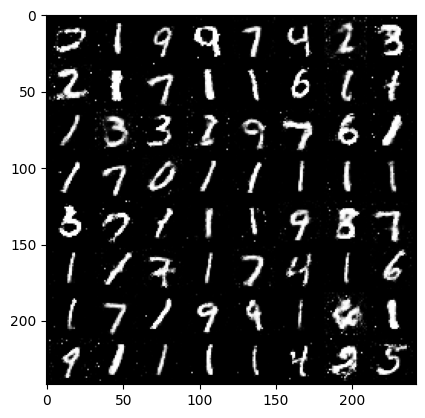

In [ ]:
import numpy as np

# Training Loop
num_epochs = 30
fixed_noise = torch.randn(64, 100, device=device)  # To visualize the progress during training

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):
        real_imgs = imgs.to(device)
        batch_size = real_imgs.size(0)

        # Ground truths
        valid = torch.ones(batch_size, 1, device=device)  # Real labels
        fake = torch.zeros(batch_size, 1, device=device)   # Fake labels

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images
        real_imgs_flat = real_imgs.view(batch_size, -1)
        pred_real = discriminator(real_imgs)
        loss_real = criterion(pred_real, valid)

        # Fake images
        z = torch.randn(batch_size, 100, device=device)  # Latent space
        fake_imgs = generator(z)
        fake_imgs_flat = fake_imgs.view(batch_size, -1)
        pred_fake = discriminator(fake_imgs.detach())
        loss_fake = criterion(pred_fake, fake)

        # Total Discriminator loss
        d_loss = (loss_real + loss_fake) / 2
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generator loss (fool the discriminator)
        pred_fake = discriminator(fake_imgs)
        g_loss = criterion(pred_fake, valid)  # Want the fake images to be classified as real
        g_loss.backward()
        optimizer_G.step()

        # Print losses every few steps
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Batch [{i}/{len(train_loader)}], "
                  f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Save and visualize the generated images
    with torch.no_grad():
        fake_imgs = generator(fixed_noise).detach().cpu()
        grid = torchvision.utils.make_grid(fake_imgs, nrow=8, normalize=True)
        plt.imshow(np.transpose(grid, (1, 2, 0)))
        plt.show()

    # Save model checkpoint
    torch.save(generator.state_dict(), "generator.pth")
    torch.save(discriminator.state_dict(), "discriminator.pth")


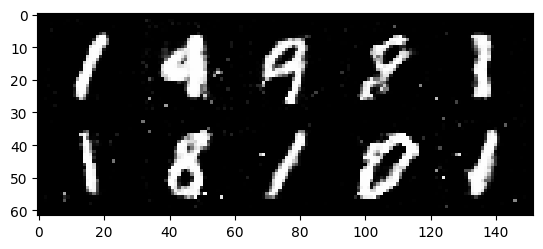

In [ ]:
# Function to visualize generated images
def show_generated_images(generator, num_images=10):
    noise = torch.randn(num_images, 100, device=device)
    with torch.no_grad():
        generated_images = generator(noise).cpu()
    grid = torchvision.utils.make_grid(generated_images, nrow=5, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()

# Show some generated images after training
show_generated_images(generator)


In [ ]:
torch.save(generator.state_dict(), "generator.pth")
torch.save(discriminator.state_dict(), "discriminator.pth")

# Loading models
generator.load_state_dict(torch.load("generator.pth"))
discriminator.load_state_dict(torch.load("discriminator.pth"))


<All keys matched successfully>